## Tín hiệu

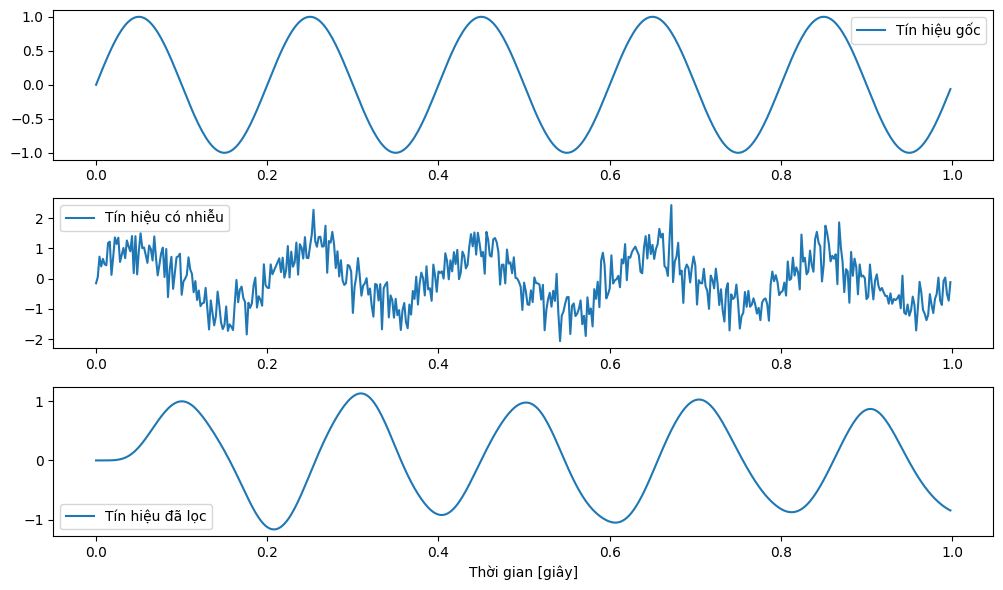

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Tạo tín hiệu mẫu
fs = 500  # Tần số lấy mẫu
t = np.linspace(0, 1, fs, endpoint=False)  # Vector thời gian
freq = 5  # Tần số của tín hiệu
signal = np.sin(2 * np.pi * freq * t)  # Tín hiệu sóng sin

# Thêm nhiễu vào tín hiệu
noise = np.random.normal(0, 0.5, signal.shape)
noisy_signal = signal + noise

# Thiết kế bộ lọc thông thấp
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Tần số Nyquist
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Áp dụng bộ lọc thông thấp vào tín hiệu có nhiễu
cutoff = 10  # Tần số cắt
filtered_signal = lowpass_filter(noisy_signal, cutoff, fs)

# Vẽ các tín hiệu
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Tín hiệu gốc')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='Tín hiệu có nhiễu')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Tín hiệu đã lọc')
plt.legend()
plt.xlabel('Thời gian [giây]')
plt.tight_layout()
plt.show()